In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import pylab
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline 

In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
x_train_org

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

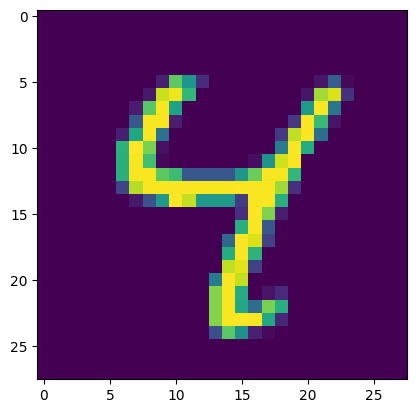

In [ ]:
n = 6
plt.imshow(x_test_org[n], cmap='viridis')
plt.show()

In [ ]:
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
print(x_train_org.shape)
print(x_train.shape)

(60000, 28, 28)
(60000, 784)


In [ ]:
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255

In [ ]:
y_train_org[2]

4

In [ ]:
utils.to_categorical(y_train_org[0], 10)
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [ ]:
model1 = Sequential()
model1.add(Dense(800, input_dim=784, activation="relu"))
model1.add(Dense(400, activation="relu"))
model1.add(Dense(10, activation="softmax"))

In [ ]:
model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 400)               320400    
                                                                 
 dense_2 (Dense)             (None, 10)                4010      
                                                                 
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model1.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 8s 5ms/step - loss: 0.2303 - accuracy: 0.9330 - val_loss: 0.1150 - val_accuracy: 0.9641
Epoch 2/15
375/375 [==============================] - 2s 4ms/step - loss: 0.0840 - accuracy: 0.9746 - val_loss: 0.0861 - val_accuracy: 0.9726
Epoch 3/15
375/375 [==============================] - 2s 4ms/step - loss: 0.0503 - accuracy: 0.9845 - val_loss: 0.0808 - val_accuracy: 0.9763
Epoch 4/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0357 - accuracy: 0.9882 - val_loss: 0.0955 - val_accuracy: 0.9738
Epoch 5/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0257 - accuracy: 0.9914 - val_loss: 0.0917 - val_accuracy: 0.9757
Epoch 6/15
375/375 [==============================] - 2s 4ms/step - loss: 0.0240 - accuracy: 0.9919 - val_loss: 0.0823 - val_accuracy: 0.9782
Epoch 7/15
375/375 [==============================] - 2s 4ms/step - loss: 0.0204 - accuracy: 0.9932 - val_loss: 0.0912 - val_accuracy: 0.9758
Epoch 

In [ ]:
model1.save_weights('model1.h5')
model1.load_weights('model1.h5')

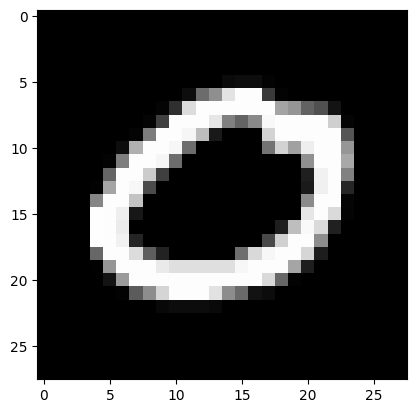

In [ ]:
n_rec = 1944
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA'))
plt.show()

In [ ]:
x = x_test[n_rec]
print(x.shape)

(784,)


In [ ]:
x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 784)


In [ ]:
prediction = model1.predict(x)

1/1 [==============================] - 0s 22ms/step


In [ ]:
print(prediction)

[[1.0000000e+00 7.2270803e-18 3.8533716e-13 2.2811309e-14 3.0591275e-15
  8.4542948e-14 1.7076159e-09 3.7638410e-14 2.9443127e-16 1.7309634e-10]]


In [ ]:
prediction = np.argmax(prediction)
print(prediction)

0
